# Specific Circuit Graph with 5 input, 1 ancilla and 15 gates

In [15]:
from qiskit import QuantumCircuit, QuantumRegister
import os, sys
import numpy
import random
from tqdm import tqdm
import rustworkx
import json
import matplotlib.pyplot as plt

if not '../' in sys.path:
    sys.path.insert(1, '../')

In [16]:
from helperfunctions.circuitgraphfunctions import get_computation_graph, get_uncomp_circuit
from helperfunctions.uncompfunctions import add_uncomputation, exhaustive_uncomputation_adding, greedy_uncomputation_full, greedy_uncomputation_partial
from helperfunctions.graphhelper import edge_attr, edge_matcher,node_attr,node_matcher, breakdown_qubit
from helperfunctions.measurecircuit import get_statevector, get_probability_from_statevector, zero_ancillas_in_statevector
from helperfunctions.constants import UncompType
from helperfunctions.randomcircuit import random_quantum_circuit_large_with_params

from rustworkx.visualization import graphviz_draw

Building Random Quantum Circuit with 5q, 1a, 15g: 100%|██████████| 15/15 [00:00<00:00, 7469.38it/s]


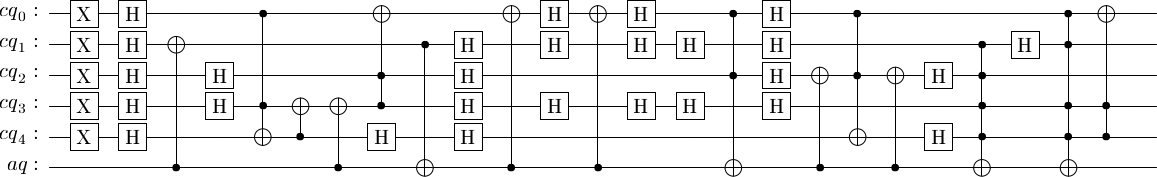

In [17]:
# Change these values for different number of input(q), ancilla(a) and gates(g)
q = 5
a = 1 
g = 15
comp_circuit, q, a, g = random_quantum_circuit_large_with_params(num_q=q,num_a=a,num_g=g,
                                                                 add_random_h=True,
                                                                 percent_aa_gates=0, 
                                                                 percent_cc_gates=0.5)
comp_circuit.draw('latex')

Computation Circuit Graph

['aq0']


Adding Nodes for Circuit: 100%|██████████| 47/47 [00:00<00:00, 160400.56it/s]


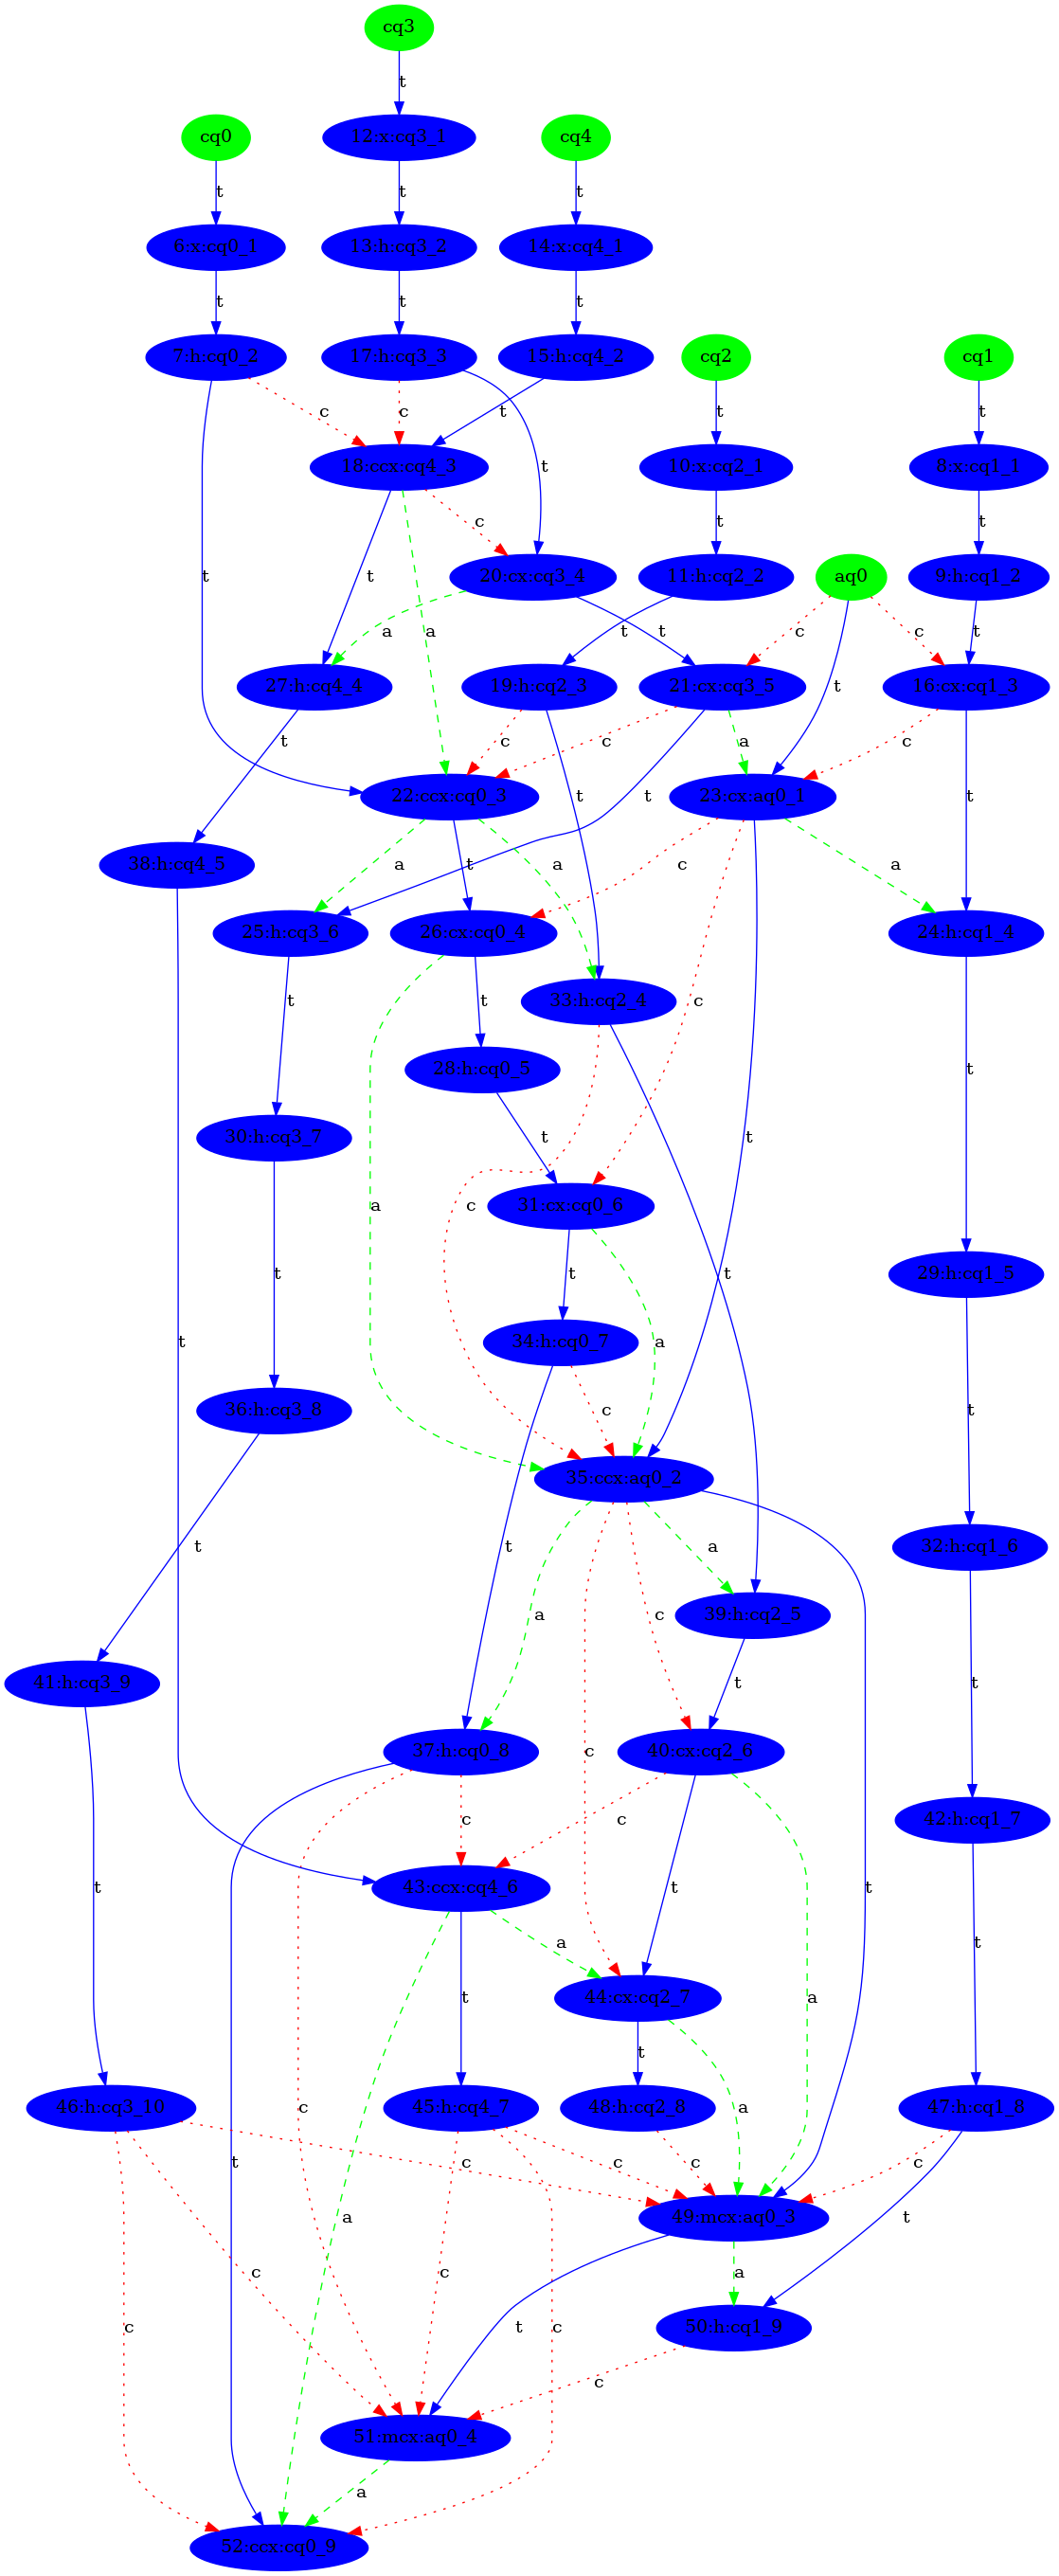

In [18]:
ancillas_list = [breakdown_qubit(q)['label'] for q in comp_circuit.qubits][-a:]
print(ancillas_list)
comp_circuit_graph = get_computation_graph(comp_circuit, ancillas_list)
graphviz_draw(comp_circuit_graph,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr,
                      )

In [19]:
uncomp_circuit_graph_with_cycles, has_cycles = add_uncomputation(comp_circuit_graph, ancillas_list, allow_cycle=True)

Cycle of Nodes in Uncomp Circuit Graph

In [20]:
simple_cycles = rustworkx.simple_cycles(uncomp_circuit_graph_with_cycles)
for cycle in simple_cycles:
    print(cycle)

NodeIndices[56, 24, 29, 32, 42, 47, 49, 50, 51, 53, 54, 55]
NodeIndices[56, 24, 29, 32, 42, 47, 49, 50, 53, 54, 55]
NodeIndices[56, 24, 29, 32, 42, 47, 49, 51, 53, 54, 55]
NodeIndices[56, 24, 29, 32, 42, 47, 50, 51, 53, 54, 55]
NodeIndices[56, 24, 29, 32, 42, 47, 50, 53, 54, 55]
NodeIndices[56, 24, 29, 32, 42, 47, 54, 55]
NodeIndices[45, 49, 50, 51, 53, 54, 55, 39, 40, 43]
NodeIndices[45, 49, 50, 51, 53, 54, 55, 37, 43]
NodeIndices[45, 49, 50, 53, 54, 55, 39, 40, 43]
NodeIndices[45, 49, 50, 53, 54, 55, 37, 43]
NodeIndices[45, 49, 51, 53, 54, 55, 39, 40, 43]
NodeIndices[45, 49, 51, 53, 54, 55, 37, 43]
NodeIndices[45, 51, 53, 54, 55, 39, 40, 43]
NodeIndices[45, 51, 53, 54, 55, 37, 43]
NodeIndices[45, 53, 54, 55, 39, 40, 43]
NodeIndices[45, 53, 54, 55, 37, 43]
NodeIndices[45, 54, 55, 39, 40, 43]
NodeIndices[45, 54, 55, 37, 43]
NodeIndices[40, 43, 44, 48, 49, 50, 51, 53, 54, 55, 39]
NodeIndices[40, 43, 44, 48, 49, 50, 53, 54, 55, 39]
NodeIndices[40, 43, 44, 48, 49, 51, 53, 54, 55, 39]
Node

Uncomp Circuit Graph

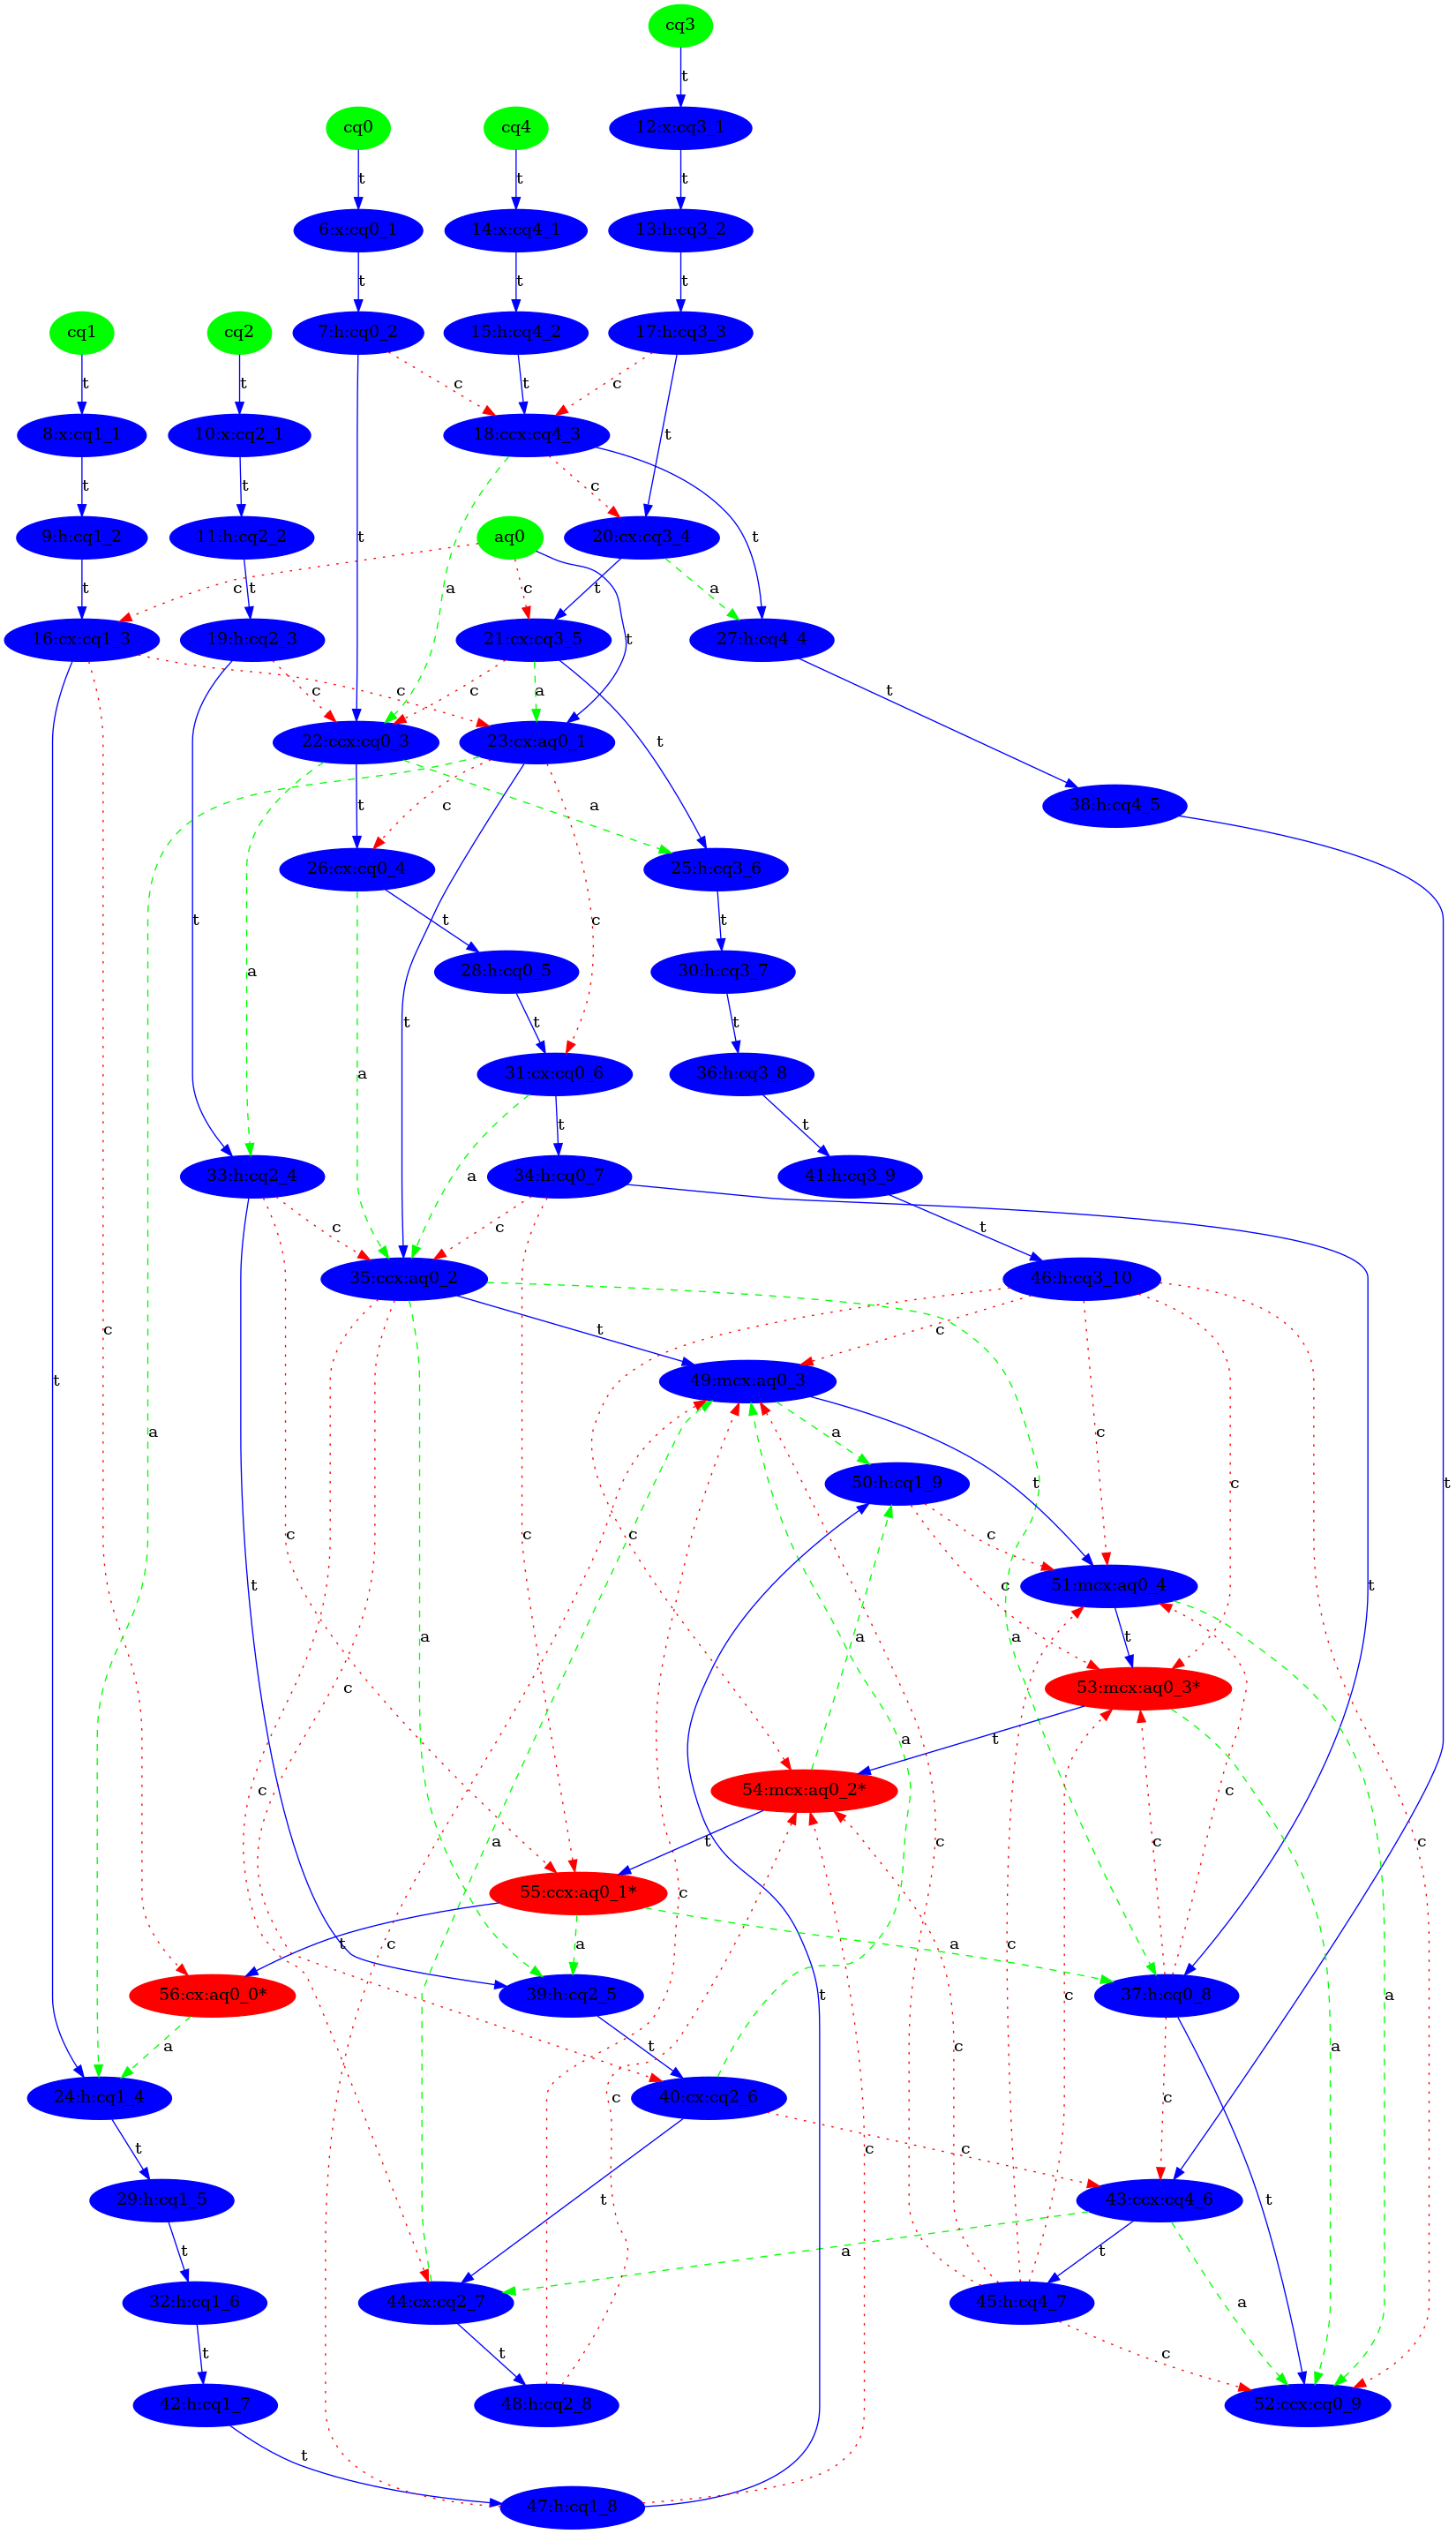

In [21]:
graphviz_draw(uncomp_circuit_graph_with_cycles,
                      node_attr_fn=node_attr,
                      edge_attr_fn=edge_attr,
                      )